#Cho em nộp bổ sung bài tập HW1 ạ
#lý do: Dạ buổi đầu em chưa nắm được lịch học và nộp dealine nên không nộp được ạ .Mong anh thông cảm cho em lần này ạ

#Exercise
This is a dataset related to how much money a person can get from a mortgage on his or her home. This dataset includes the following features:
* Gender: Gender of the borrower (including two values 'F' and 'M')
* Age: Age of the customer applying for a loan (including positive integer values)
* Income (USD): Customer's income in USD (value is a positive number)
* Income Stability: The level of customer's income stability (including three values of Low and High)
* Property Age: Life expectancy of the house in days (including positive integer values)
* Property Location: Location of the house (including 'Rural', 'Urban', and 'Semi-Urban')
* Property Price: The value of the house in USD (including positive real values)
* Loan Sanction Amount (USD): Amount that customers can borrow in USD (target value)

Based on practice sample #1, proceed:
1. Read data
2. Visualize some information of data
3. Normalize Data to train linear regression model
4. Train linear regression model and show the model's intercepts, coeficients
5. Learn on sklearn how to use Ridge, Lasso, and ElasticNet compare the error of all 3 algorithms with Linear Regression (https://scikit-learn.org/stable/index.html)
6. Let's try Polynomial of order 2 to compare the previous results. What will the result be if we choose the n order too high?


In [ ]:
# mount data from google drive to colab
from google.colab import drive
drive.mount('/content/drive')

#import library
import pandas as pd # pandas
import numpy as np # numpy
import time


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Prepare and Analyze Data

1. Load Dataset
2. Analyze Dataset
3. Preprocess data (type, null, missing, ...)
4. Feature Engineering

## Load Dataset

In [ ]:
# read data using Pandas DataFrame
def read_dataset(path):
    # Todo: read_csv from a path and return a DataFrame
    df = pd.read_csv(path)
    display(df.head())
    display(df.describe())
    return df

In [ ]:
path = "/content/final_house_loan (1).csv" # Path to your file
df = read_dataset(path)
#ToDo: Show histogram of dataframe

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336


,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
count,47297.000000,47265.000000,47263.000000,4.729700e+04,47297.000000
mean,40.000063,2586.684384,2586.611058,1.350880e+05,46487.229765
std,16.086128,1558.768809,1558.842286,9.457875e+04,32549.905634
min,18.000000,372.700000,370.700000,7.859620e+03,254.586578
25%,24.000000,1653.740000,1652.820000,6.250408e+04,21782.822159
50%,40.000000,2245.480000,2244.810000,1.130936e+05,38822.132402
75%,55.000000,3128.560000,3128.380000,1.819546e+05,62612.236905
max,65.000000,54662.750000,54647.750000,1.077967e+06,366131.165218


## Data Analysis

<Axes: >

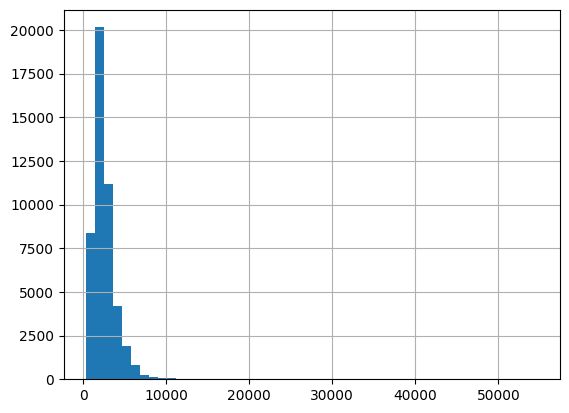

In [ ]:
# Data analysis
# Todo: analyze your data here
df["Income (USD)"].hist(bins=50)

<Axes: xlabel='Loan Sanction Amount (USD)', ylabel='Count'>

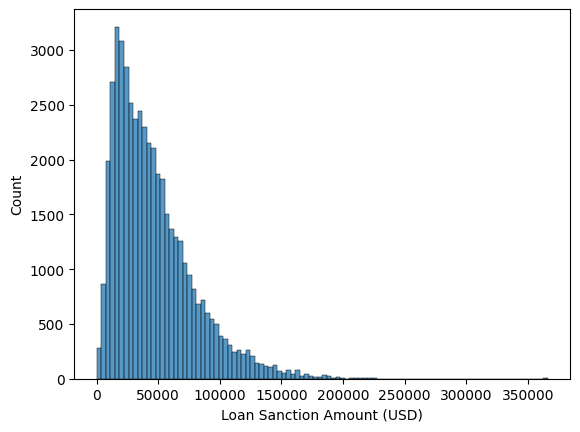

In [ ]:
import seaborn as sns
sns.histplot(x="Loan Sanction Amount (USD)", data=df, bins=100)

In [ ]:
# Null checking
df.isnull().sum()

Gender                         0
Age                            0
Income (USD)                  32
Income Stability              12
Property Age                  34
Property Location              3
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

## Preprocessing

In [ ]:
def preprocessing_data(df):
    # --- (Optional) Drop null datapoints or fill missing data
    # Keep your data the same if you dont want to customize it
    print("Sample size:", len(df))
    df = df.dropna()
    print("Sample size after:", len(df))
    return df

In [ ]:
df = preprocessing_data(df.copy())

# check again
df.isnull().sum()

Sample size: 47297
Sample size after: 47251


Gender                        0
Age                           0
Income (USD)                  0
Income Stability              0
Property Age                  0
Property Location             0
Property Price                0
Loan Sanction Amount (USD)    0
dtype: int64

## Feature Engineering

In [ ]:
def normalize_data(df):
    # Todo: normalize data into numerical data
    normalized_data = df.copy()
    normalized_data["Gender"] = normalized_data["Gender"].astype("category").cat.codes
    normalized_data["Income Stability"] = normalized_data["Income Stability"].astype("category").cat.codes
    normalized_data["Property Location"] = normalized_data["Property Location"].astype("category").cat.codes

    display(normalized_data.head())
    display(normalized_data.corr())
    return normalized_data

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,0,19,1641.25,1,1651.25,0,59641.82,21026.420753
1,1,29,1989.71,1,1990.71,2,179858.51,60595.183366
2,0,37,1849.91,1,1856.91,0,117297.62,39181.648002
3,1,65,2735.18,0,2747.18,0,354417.72,128497.710865
4,0,62,4741.78,0,4740.78,2,82049.80,39386.919336


,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
Gender,1.000000,0.007706,-0.002445,-0.019000,-0.002512,0.009142,0.005931,0.003396
Age,0.007706,1.000000,-0.044086,-0.455855,-0.044085,-0.007770,-0.003274,-0.000115
Income (USD),-0.002445,-0.044086,1.000000,0.080961,0.999986,-0.000199,0.358110,0.392897
Income Stability,-0.019000,-0.455855,0.080961,1.000000,0.081008,-0.001959,0.004813,-0.070969
Property Age,-0.002512,-0.044085,0.999986,0.081008,1.000000,-0.000233,0.358110,0.392892
Property Location,0.009142,-0.007770,-0.000199,-0.001959,-0.000233,1.000000,-0.000898,-0.001988
Property Price,0.005931,-0.003274,0.358110,0.004813,0.358110,-0.000898,1.000000,0.994429
Loan Sanction Amount (USD),0.003396,-0.000115,0.392897,-0.070969,0.392892,-0.001988,0.994429,1.000000


<Axes: >

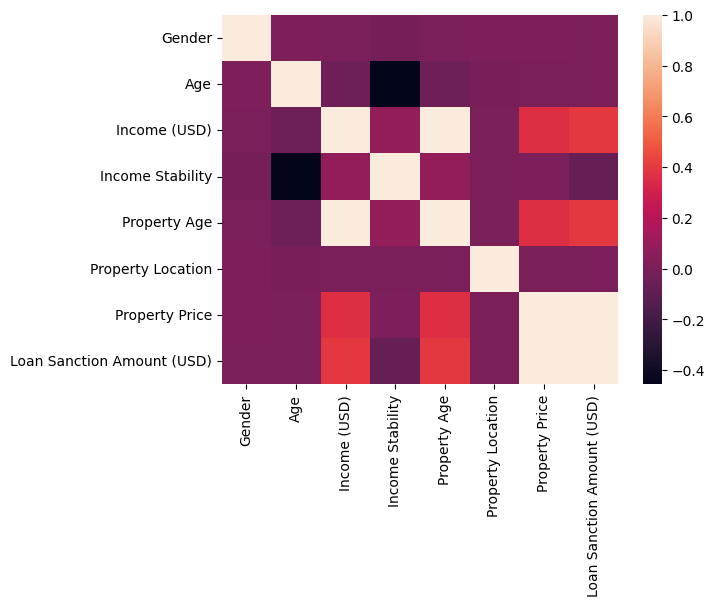

In [ ]:
# Heatmap
import seaborn as sns

df = normalize_data(df.copy())
sns.heatmap(df.corr()) # Show heatmap after normalized data

# Apply machine learning model

## Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
def prepare_X_y(df):
    # Split data into X and y. Return two dataframes
    columns = df.columns.tolist()
    columns.remove("Loan Sanction Amount (USD)")
    X = df[columns]
    # Todo: Select features
    y = df["Loan Sanction Amount (USD)"]
    # Todo: Select label
    return X, y

X, y = prepare_X_y(df)

In [ ]:
def split_train_test(X, y, train_size=0.7):
    trainX, testX ,trainY, testY = train_test_split(X, y, train_size=train_size, random_state=2023)
    # Use sklearn train_test_split to split X and y into 2 sets: train set and test set. With train_size is the proportion of train_set and fix the random_state with a number
    print('Training:' + str(trainX.shape))
    print('Test:' + str(testX.shape))

    return trainX, testX ,trainY, testY

In [ ]:
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = split_train_test(X, y, train_size=TRAIN_SIZE)

Training:(33075, 7)
Test:(14176, 7)


## Basic Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

def build_linear_model(X, y):
    model = LinearRegression(fit_intercept=True)
    model.fit(X,y)
    # Todo: use sklearn model and config your parameters
    # Todo: fit your model with X, y

    return model

model = build_linear_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY))
pred = model.predict(testX)
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_

mean absolute error of linear model on train set  163.14116153145872
mean absolute error of linear model on test set  137.10457506737418
[-2.34483815e+02 -7.93861753e+01  5.50183711e-01 -1.11431363e+04
  4.74551612e-01 -6.02929137e+01  3.36339576e-01]

11896.351699425148


LASSO

In [ ]:
from sklearn.linear_model import Lasso

def build_lasso_model(X, y):
    model = Lasso(alpha=0.5, tol=0.01)
    model.fit(X, y)
    # Todo: use sklearn model and config your parameters
    # Todo: fit your model with X, y
    return model

model = build_lasso_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
print("mean absolute error of lasso model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)
print("mean absolute error of lasso model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_

mean absolute error of lasso model on train set  168.44440501523707
mean absolute error of lasso model on test set  142.1713612191113
[-2.31695387e+02 -7.77554968e+01  8.81949554e-01 -1.10998703e+04
  1.59656264e-01 -5.94528762e+01  3.36239036e-01]

11759.387326778859


RIDGE

In [ ]:
from sklearn.linear_model import Ridge

def build_ridge_model(X, y):
    model = Ridge(alpha=1.0)
    # Todo: use sklearn model and config your parameters
    # Todo: fit your model with X, y
    model.fit(X, y)

    return model

model = build_ridge_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
print("mean absolute error of ridge model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)
print("mean absolute error of ridge model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_

mean absolute error of ridge model on train set  163.27104902986133
mean absolute error of ridge model on test set  137.22286291308296
[-2.34413176e+02 -7.93438667e+01  5.51497567e-01 -1.11378235e+04
  4.73173644e-01 -6.02824252e+01  3.36339895e-01]

11889.892895035533


ELASTIC

In [ ]:
from sklearn.linear_model import ElasticNet

def build_elastic_model(X, y):
    model = ElasticNet(alpha=1.0, l1_ratio=0.5, tol=0.009)
    # Todo: use sklearn model and config your parameters
    # Todo: fit your model with X, y
    model.fit(X, y)

    return model

model = build_elastic_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
print("mean absolute error of elastic model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)
print("mean absolute error of elastic model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_

mean absolute error of elastic model on train set  1751.7668603228274
mean absolute error of elastic model on test set  1745.735548599278
[-5.11995365e+01 -4.25646004e-02  9.04532928e-01 -1.25133365e+03
  1.78441245e-02 -2.56820145e+01  3.36829618e-01]

-222.64547734952794


## Polynomial Transform

When the data feature does not conform to a linear function, a linear regression cannot be applied directly to the original data. Then, there are many possibilities that the data feature conforms to the polynomial function. Scikit-Learn supports converting data features to polynomials through ``PolynomialFeatures``.

$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

The formula above uses the transformation of the value $x$ from one dimension to the other, with the aim of being able to use linear regression to find complex relationships between $x$ and $y$.

Degree 1 -> n

In [ ]:
#Linear Regression with Polynomial Transform
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def build_pipeline(X, y, n):
    poly_model = make_pipeline(PolynomialFeatures(n, include_bias = False), LinearRegression())
    # use make_pipeline to apply PolynomialFeatures and a Regression model train your dataset
    poly_model.fit(X, y)

    return poly_model

# Compare on training dataset
degree = 2
poly_model_degree_2 = build_pipeline(trainX, trainY, degree)
poly_pred_train_degree_2 = poly_model_degree_2.predict(trainX)
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred_train_degree_2, y_true=trainY))

poly_pred_test_degree_2 = poly_model_degree_2.predict(testX)
print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=poly_pred_test_degree_2, y_true=testY))

mean absolute error of linear model (with poly transform) on train set  159.7115198405628
mean absolute error of linear model (with poly transform) on test set  133.85237743200997


Degree 1
mean absolute error of linear model (with poly transform) on train set 163.1411615309432
mean absolute error of linear model (with poly transform) on test set 137.10457506684105

Degree 2
mean absolute error of linear model (with poly transform) on train set 159.7115198405628
mean absolute error of linear model (with poly transform) on test set 133.85237743200997

Degree 3
mean absolute error of linear model (with poly transform) on train set 247.26581715599326
mean absolute error of linear model (with poly transform) on test set 224.51243703602165

Degree 4
mean absolute error of linear model (with poly transform) on train set 2322.254547188427
mean absolute error of linear model (with poly transform) on test set 2349.691235922709

Degree 5
mean absolute error of linear model (with poly transform) on train set 5640.523001457538
mean absolute error of linear model (with poly transform) on test set 5701.494078701799

Degree 6
mean absolute error of linear model (with poly trans

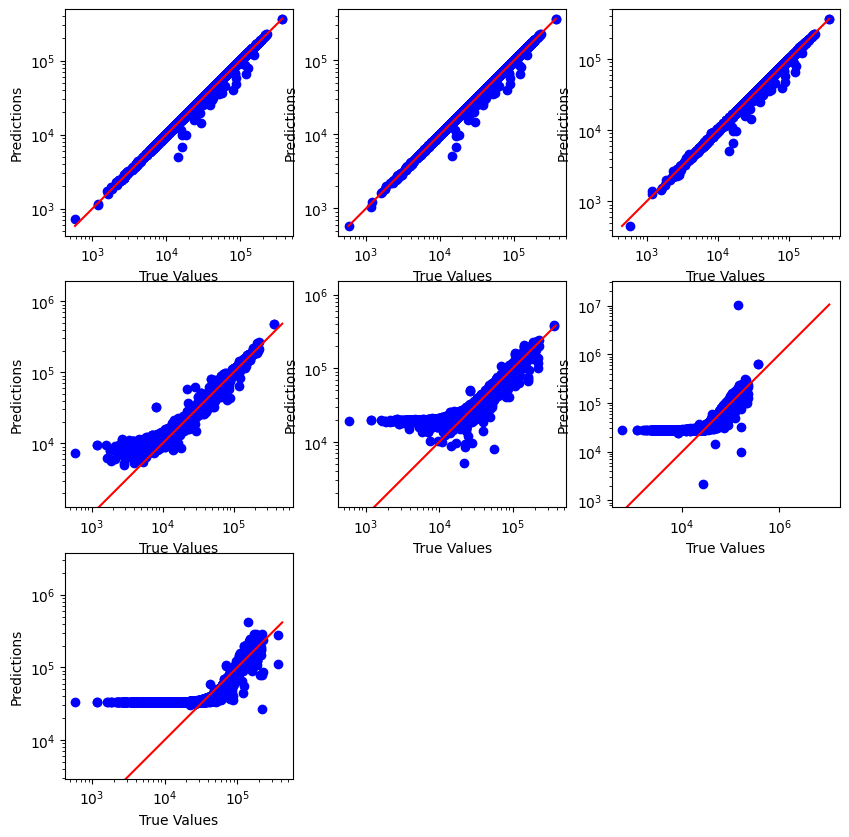

In [ ]:
degree = 7
columns = 3
rows = 3
fig = plt.figure(figsize=(10, 10))

for i in range(1, degree+1):
    fig.add_subplot(rows, columns, i)

    poly_model = build_pipeline(trainX, trainY, i)
    poly_pred_test = poly_model.predict(testX)
    poly_pred_train = poly_model.predict(trainX)

    plt.scatter(testY, poly_pred_test, c='blue')
    plt.yscale('log')
    plt.xscale('log')

    p1 = max(max(poly_pred_test), max(testY))
    p2 = min(min(poly_pred_test), min(testY))
    plt.plot([p1, p2], [p1, p2], 'r-')
    plt.xlabel('True Values', fontsize=10)
    plt.ylabel('Predictions', fontsize=10)
    plt.axis('equal')

    print(f"Degree {i}")
    print(f"mean absolute error of linear model (with poly transform) on train set", mean_absolute_error(y_pred=poly_pred_train, y_true=trainY))
    print(f"mean absolute error of linear model (with poly transform) on test set", mean_absolute_error(y_pred=poly_pred_test, y_true=testY))
    print()
plt.show()

Sau khi sử dụng biến đổi Polynomial cho dữ liệu nếu ta càng tăng $n$ thì sẽ dẫn đến hiện tượng overfitting.